In [3]:
import gym
import numpy as np
from random import choice
import hus_bao

In [4]:
env = gym.make('HusBao-v0')

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
nb_moves = []

for _ in range(50000):
    env.reset()
    i = 0
    while not env.done:
        i += 1
        action = choice(env.get_available_actions())
        env.step(action)  # take a random action
    nb_moves.append(i)


data = np.asarray(nb_moves)

print("Average: " + str(np.average(data)))
print("Median: " + str(np.median(data)))
print("Min: " + str(data.min()))
print("Max: " + str(data.max()))

Average: 54.12104
Median: 39.0
Min: 3
Max: 603


In [4]:
max_stones = 0
nb_over150 = 0
empty_front_row = 0
for i in range(100000):
    if i > 0 and i % 10000 == 0:
        print("Playing game", i)
    env.reset()
    m = 0
    while not env.done:
        m += 1
        action = choice(env.get_available_actions())
        env.step(action)
        max_nb = np.max(env.state)
        max_stones = max(max_stones, max_nb)
    if np.max(env.state[1]) == 0:
        empty_front_row += 1
    if m > 150:
        nb_over150 += 1
print("Maximum amount of stones on one field:", max_stones)
print("Games with more than 150 moves: " + str(nb_over150) + " (" + str(nb_over150 / 1000) + "%)")
print("Games lost because of an empty front row: " + str(empty_front_row) + " (" + str(empty_front_row / 1000) + "%)")

Playing game 10000
Playing game 20000
Playing game 30000
Playing game 40000
Playing game 50000
Playing game 60000
Playing game 70000
Playing game 80000
Playing game 90000
Maximum amount of stones on one field: 32
Games with more than 150 moves: 5097 (5.097%)
Games lost because of an empty front row: 99413 (99.413%)


In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Playing game 10000
Playing game 20000
Playing game 30000
Playing game 40000
Playing game 50000
Playing game 60000
Playing game 70000
Playing game 80000
Playing game 90000
13    0.13572
12    0.13414
14    0.12021
11    0.11421
15    0.09794
10    0.08878
16    0.07164
9     0.05885
17    0.04944
18    0.03220
8     0.03153
19    0.02024
7     0.01269
20    0.01230
21    0.00745
22    0.00456
6     0.00266
23    0.00233
24    0.00145
25    0.00072
26    0.00053
27    0.00028
28    0.00004
29    0.00004
31    0.00003
30    0.00001
5     0.00001
dtype: float64


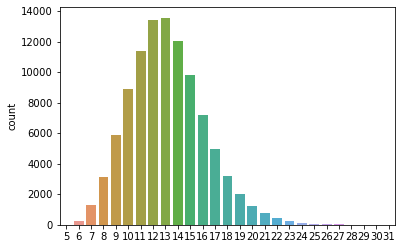

In [18]:
max_stones = []
for i in range(100000):
    if i > 0 and i % 10000 == 0:
        print("Playing game", i)
    env.reset()
    m = 0
    game_max = 0
    while not env.done:
        m += 1
        action = choice(env.get_available_actions())
        env.step(action)
        max_nb = np.max(env.state)
        game_max = max(game_max, max_nb)
    max_stones.append(game_max)

max_stones_series = pd.Series(max_stones)
sns.countplot(max_stones_series)
print(max_stones_series.value_counts() / max_stones_series.value_counts().sum())